In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Homework 1: Classification of handwritten digits

In [19]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/digits.csv'
digits = pd.read_csv(url)
digits.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [29]:
# feature matrix and target vector
X = digits.iloc[:,0:784]
y = digits['class']

There are 5,000 images, and each image has 784 features. This is because each image is  28×28  pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black).

Let's take a peek at one digit from the dataset. All we need to do is grab an instance's feature vector, reshape it to a 28\times 28 array, and display it using imshow()

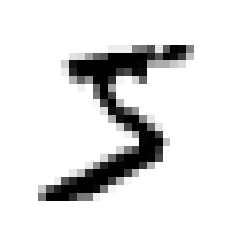

In [35]:
some_digit = X.loc[0,:].to_numpy()
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

This looks like a 5, and indeed that's what the label tells us

In [36]:
y[0]

5

The following figure shows a few more images from the dataset

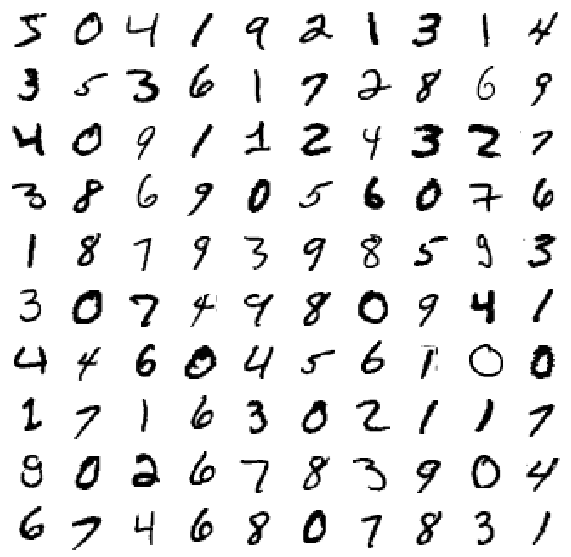

In [37]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X.loc[i,:].to_numpy()
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

The **goal** is to train a "5-detector": a dectector capable of distinguishing between 5's and non-5's.

You need to:
- choose between classifiers (knn, logistic regression or regression)
- tune in the classifier hyperparameters
- quantify the model performance

Test your "5-detector" on the following test set

In [49]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/digits_test.csv'
digits_test = pd.read_csv(url)
digits_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
